## Imports & Formatting:

In [1]:
from signal_processing import pure_tone_complex, sound, magphase, get_spect, magphase
import matplotlib.pyplot as plt
from scipy.signal import spectrogram as sp
import scipy as scip
import numpy as np

#Formatting (to center plots):
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

## F0_DL Discrimination Task Stimuli:

### TODO:
   - Parameterize nicely
   - Add noise to reduce distortion products?

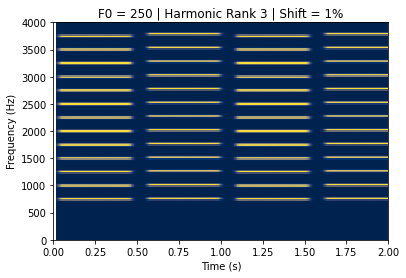

In [75]:
F0 = 250;
shift = 0.01;
harm_rank = 3;
tot_harm = 16;

fs = 44100
atten = 0.75;
spacing = .03;
dur_sec = .5;
ramp_dur = 0.2;

###################################################################################################################
freq_Hz1 = np.arange(harm_rank,tot_harm)*F0;
freq_Hz2 = freq_Hz1*(1+shift);

mags = atten*np.ones(len(freq_Hz1));
phi = np.zeros(len(freq_Hz1));
space = np.zeros(round(spacing*fs));

ham_win = np.hamming(round(dur_sec*fs*ramp_dur));
ham = np.concatenate([ham_win[0:round(len(ham_win)/2)],np.ones(round((dur_sec*(1-ramp_dur))*fs)), 
                      ham_win[round(len(ham_win)/2):len(ham_win)]]);

F_1 = pure_tone_complex(freq_Hz1, fs, dur_sec, mags, phi)
F_2 = pure_tone_complex(freq_Hz2, fs, dur_sec, mags, phi)

signal = np.concatenate([ham*F_1[1],space,ham*F_2[1],space,ham*F_1[1],space,ham*F_2[1]]);
time = np.arange(0,dur_sec*4,1/fs);

get_spect(signal, fs, DR = 30, BW = 100, xlim = [0,2], ylim = [0,4e3], 
          colormap = 'cividis', title = 'F0 = 250 | Harmonic Rank 3 | Shift = 1%');

sound(signal,fs,fname = 'f0dl.wav',savefile = 0)

## FM Harmonic Tone Complex Stimuli:
### TODO:
   - Same as above

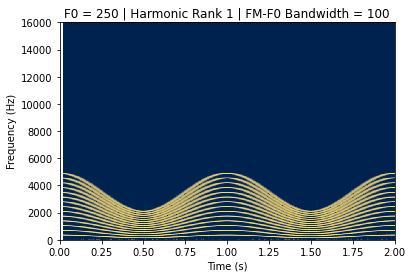

In [204]:
%matplotlib inline

F0 = 250;
a_mod = 100;
rate_mod = 1;
harm_rank = 1;
tot_harm = 15;
fs = 44100
dur_sec = 3;
amp = 0.7;


samples = np.arange(0,fs*dur_sec);
time_sec = samples/fs;
harm_no = np.arange(harm_rank,tot_harm);

for i in range(len(harm_no)):
    amp_mod = a_mod*harm_no[i];
    F0_temp = F0*harm_no[i];
    mod = amp_mod*np.sin(2*np.pi*rate_mod*time_sec);
    sig_temp = amp*np.sin(2*np.pi*F0_temp*time_sec + mod);
    
    sig_arr = np.array(sig_temp)
    
    if i==0:
        sig = sig_arr;
    else:
        sig = sig + sig_arr;

sound(sig,fs,fname = 'FM.wav',savefile = 0)
get_spect(sig, fs, DR = 200, BW = 100, xlim = [0,2], ylim = [0,16e3], 
          colormap = 'cividis', title = 'F0 = 250 | Harmonic Rank 1 | FM-F0 Bandwidth = 100');
